# FUNGUS MYCETOMA CLASSIFICATION

## Method : bayesian classifier

<p> Reminders about data :
    <ul>
        <li> FM : fungus / BM : bacterial
        <li> label = type + n°patient + _ + n°grain
    </ul>
</p>

In [1]:
%run dataManagementPart2.ipynb

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import f1_score, roc_curve, roc_auc_score

from scikitplot.metrics import plot_confusion_matrix, plot_roc_curve

##### 1) Getting data

In [3]:
file1 = './Data/radiomics_features_set1.csv'
file2 = './Data/radiomics_features_set2.csv'

In [4]:
data = readCSV(file1,file2)

In [6]:
# fungus mycetoma type
y = getLabels(data)[1]

# associated data
X = getData(data)[1]

(206, 102) (37, 102) (16, 102)


##### 2) Balancing data

In [7]:
nb1 = y.count(1)
nb2 = y.count(2)
print("Number of type 1 :",nb1)
print("Number of type 2 :",nb2)

balanced_y = []
balanced_X = []

cpt = 0
for i in range(len(y)):
    if y[i] == 1 and cpt != nb2:
        balanced_y.append(y[i])
        balanced_X.append(data.iloc[i])
        cpt += 1
    elif y[i] == 2:
        balanced_y.append(y[i])
        balanced_X.append(X.iloc[i,:])

        
X = pd.DataFrame(balanced_X,index=[i for i in range(nb2*2)],columns=X.columns)
y = balanced_y
nb1_end = y.count(1)
nb2_end = y.count(2)
print("Number of type 1 :",nb1_end)
print("Number of type 2 :",nb2_end)

Number of type 1 : 166
Number of type 2 : 111
Number of type 1 : 111
Number of type 2 : 111


##### 3) Defining training and testing data

In [8]:
# preprocessing the data to remove negative numbers
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print("Training data dimension :",X_train.shape)
print("Test data dimension :",X_test.shape)

Training data dimension : (166, 102)
Test data dimension : (56, 102)


##### 4) Learning

- Gaussian Naive Bayes algorithm

In [10]:
gaussian = GaussianNB()

In [11]:
y_gauss = gaussian.fit(X_train,y_train).predict(X_test)

- Multinomial Naive Bayes algorithm

In [12]:
multinomial = MultinomialNB()

In [13]:
y_multi = multinomial.fit(X_train,y_train).predict(X_test)

- Complement Naive Bayes

In [14]:
complement = ComplementNB()

In [15]:
y_compl = complement.fit(X_train,y_train).predict(X_test)

- Bernoulli algorithm

In [16]:
bernoulli = BernoulliNB()

In [17]:
y_bern = bernoulli.fit(X_train,y_train).predict(X_test)

- Categorical

In [18]:
categorical = CategoricalNB(min_categories=102)

In [19]:
y_cat = categorical.fit(X_train,y_train).predict(X_test)

##### 5) Testing

- cross-validation

In [20]:
cv_gauss = cross_val_score(gaussian, X, y)
print("---> with gaussian :", cv_gauss)

---> with gaussian : [0.62222222 0.68888889 0.61363636 0.70454545 0.77272727]


In [21]:
cv_multi = cross_val_score(multinomial, X, y)
print("---> with multinomial :",cv_multi)

---> with multinomial : [0.62222222 0.68888889 0.61363636 0.70454545 0.70454545]


In [22]:
cv_compl = cross_val_score(complement, X, y)
print("---> with complement :",cv_compl)

---> with complement : [0.62222222 0.68888889 0.61363636 0.70454545 0.70454545]


In [23]:
cv_bern = cross_val_score(bernoulli, X, y)
print("---> with bernoulli :",cv_bern)

---> with bernoulli : [0.51111111 0.51111111 0.52272727 0.5        0.47727273]


In [24]:
cv_cat = cross_val_score(categorical, X, y)
print("---> with categorical :",cv_cat)

---> with categorical : [0.64444444 0.48888889 0.72727273 0.68181818 0.61363636]


- confusion matrix

---> with gaussian :


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

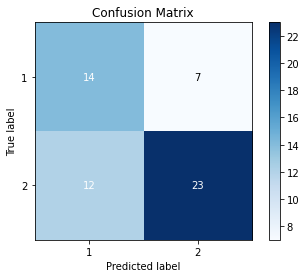

In [25]:
print("---> with gaussian :")
plot_confusion_matrix(y_test,y_gauss)

---> with multinomial :


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

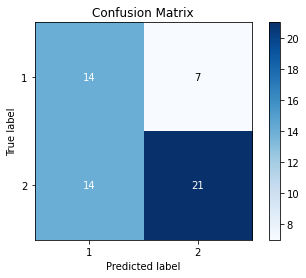

In [26]:
print("---> with multinomial :")
plot_confusion_matrix(y_test,y_multi)

---> with complement :


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

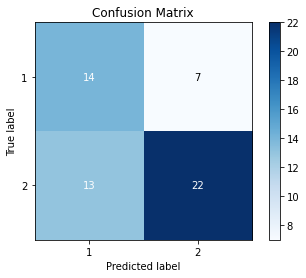

In [27]:
print("---> with complement :")
plot_confusion_matrix(y_test,y_compl)

---> with bernoulli :


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

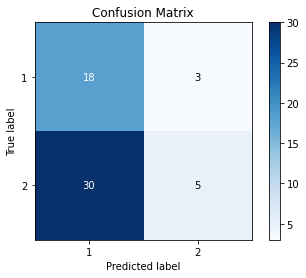

In [28]:
print("---> with bernoulli :")
plot_confusion_matrix(y_test,y_bern)

---> with categorical :


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

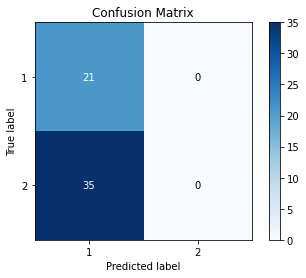

In [29]:
print("---> with categorical :")
plot_confusion_matrix(y_test,y_cat)

- precision, recall, F-measure

<p> Reminder :
    <ul>
        <li> Precision quantifies the number of positive class predictions that actually belong to the positive class.
        <li> Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
        <li> F-measure provides a single score that balances both the concerns of precision and recall in one number.
    </ul>
</p>

In [30]:
f1_gauss = f1_score(y_test,y_gauss)
print("---> with gaussian :",f1_gauss)

---> with gaussian : 0.5957446808510638


In [31]:
f1_multi = f1_score(y_test,y_multi)
print("---> with multinomial :",f1_multi)

---> with multinomial : 0.5714285714285715


In [32]:
f1_compl = f1_score(y_test,y_compl)
print("---> with complement :",f1_compl)

---> with complement : 0.5833333333333334


In [33]:
f1_bern = f1_score(y_test,y_bern)
print("---> with bernoulli :",f1_bern)

---> with bernoulli : 0.5217391304347825


In [34]:
f1_cat = f1_score(y_test,y_cat)
print("---> with categorical :",f1_cat)

---> with categorical : 0.5454545454545454


- roc curves

---> with gaussian :


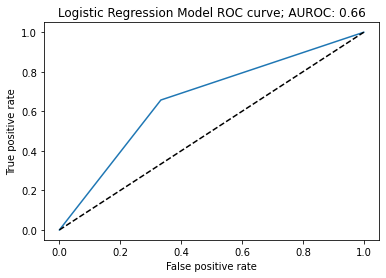

In [38]:
print("---> with gaussian :")

fpr,tpr,thresholds = roc_curve(y_test,y_gauss,pos_label=2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_gauss), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');
plt.show()

---> with multinomial :


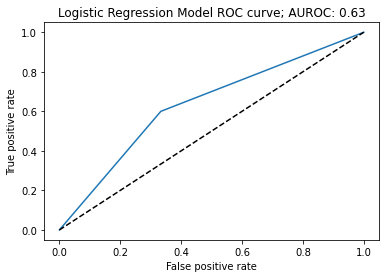

In [39]:
print("---> with multinomial :")


fpr,tpr,thresholds = roc_curve(y_test,y_multi,pos_label=2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_multi), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');
plt.show()

---> with complement :


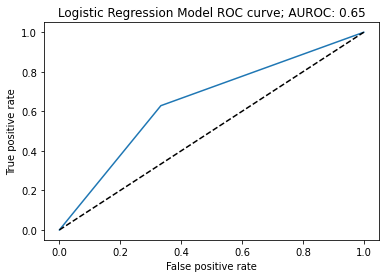

In [40]:
print("---> with complement :")

fpr,tpr,thresholds = roc_curve(y_test,y_compl,pos_label=2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_compl), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');
plt.show()

---> with bernoulli :


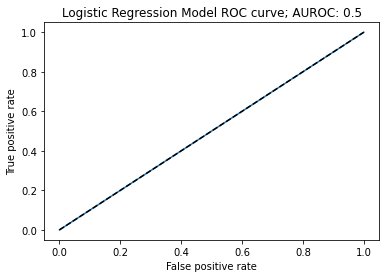

In [41]:
print("---> with bernoulli :")

fpr,tpr,thresholds = roc_curve(y_test,y_bern,pos_label=2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_bern), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');
plt.show()

---> with categorical :


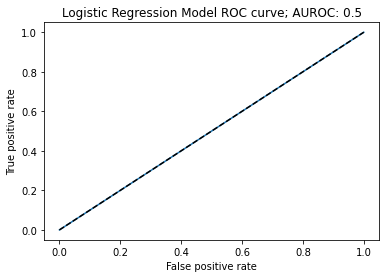

In [42]:
print("---> with categorical :")

fpr,tpr,thresholds = roc_curve(y_test,y_cat,pos_label=2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_cat), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');
plt.show()